In [1]:
# Image Weeder

Once we have remove the images we weed out the ones that do not seem to be photographs or are too small.

TODO
- Compare with Microsoft Cognitive Services ?
- Work on black background edge case.

In [2]:
import os
from PIL import Image
import shutil
from IPython import display

In [3]:
# Check what the directories exist in "."
[name for name in os.listdir(".") if os.path.isdir(name)]

['.git', '.idea', '.ipynb_checkpoints', 'docs', 'imgs', 'test_images']

In [4]:
# Directories where we will sort the images
download_dir = "imgs/"
medium_img_dir = download_dir + "medium_img/"
too_small_img_dir = download_dir + "too_small_img/"
photo_img_dir = download_dir + "photo_img/"
drawing_img_dir = download_dir + "drawing_img/"
dirs = [medium_img_dir, too_small_img_dir, photo_img_dir, drawing_img_dir]

In [5]:
# Create directories if they don't exist
for dir in dirs:
    if not os.path.exists(dir):
        os.makedirs(dir)

if not os.path.exists(too_small_img_dir):
    os.makedirs(too_small_img_dir)


In [6]:
# Filter out images smaller than 100 pixels
files = [ ] 
for f in os.listdir(download_dir):
    if f != ".DS_Store" and not os.path.isdir(download_dir+f):
        files.append(f)
print("sorting images from " + download_dir + " to " +
      medium_img_dir + " and " + too_small_img_dir )
for file in files:
    try:
        img = Image.open(download_dir+file)
    except Exception as e:
        print("Could not open photo", e)
    if img.width > 100 or img.height > 100:
        shutil.copyfile(download_dir+file, medium_img_dir+file)
    else:
        shutil.copyfile(download_dir+file, too_small_img_dir+file)
print("download_dir " , len(os.listdir(download_dir)) , 
      "medium_img_dir" , len(os.listdir(medium_img_dir)),
      "too_small_img_dir" , len(os.listdir(too_small_img_dir)))

sorting images from imgs/ to imgs/medium_img/ and imgs/too_small_img/
Could not open photo cannot identify image file 'imgs/http%3A%2F%2Fmw2.wsj.net%2Fpublic%2Fsvg%2Ficons%2Fico-facebook-white.svg'
Could not open photo cannot identify image file 'imgs/http%3A%2F%2Fmw2.wsj.net%2Fpublic%2Fsvg%2Ficons%2Fico-twitter-white.svg'
download_dir  202 medium_img_dir 126 too_small_img_dir 71


In [7]:
# Filter iout mages > 4 MB ( Microsoft doesn't accept images > $MB)

In [8]:
# Filter out images that have too many repeated colors
# From http://stackoverflow.com/questions/9354744/how-to-detect-if-an-image-is-a-photo-clip-art-or-a-line-drawing
from PIL import Image
medium_files = [ f for f in os.listdir(medium_img_dir)]
color_ratios = []
for file in medium_files:
    try:
        img = Image.open(medium_img_dir+file)
    except Exception as e:
        print("could not open photo", e)
    #img = Image.open(file)
    img.thumbnail((200, 200), Image.ANTIALIAS)
    w, h = img.size
    colors = img.convert('RGB').getcolors(w*h)
    most_repeated_colors = sorted(colors, key=lambda x: x[0], reverse=True)
    repeated_colors_ratio = sum([x[0] for x in most_repeated_colors[:10]])/float(w*h)
    color_ratios.append(repeated_colors_ratio)
    if repeated_colors_ratio > 0.3:
        shutil.copyfile(medium_img_dir+file, drawing_img_dir+file)
    else:
        shutil.copyfile(medium_img_dir+file, photo_img_dir+file)
    

could not open photo cannot identify image file 'imgs/medium_img/http%3A%2F%2Fmw2.wsj.net%2Fpublic%2Fsvg%2Ficons%2Fico-facebook-white.svg'
could not open photo cannot identify image file 'imgs/medium_img/http%3A%2F%2Fmw2.wsj.net%2Fpublic%2Fsvg%2Ficons%2Fico-twitter-white.svg'


In [9]:
# Checking how the images where distributed
print("medium_img_dir" , len(os.listdir(medium_img_dir)),
      "photo_img_dir " , len(os.listdir(photo_img_dir)) , 
      "drawing_img_dir" , len(os.listdir(drawing_img_dir)))

medium_img_dir 126 photo_img_dir  107 drawing_img_dir 19


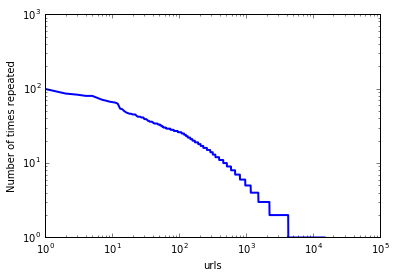

In [10]:
# What the distribution of colors looks like.
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
repeated_colors = [x[0] for x in most_repeated_colors]
line, = ax.plot(repeated_colors, color='blue', lw=2)
ax.set_yscale('log')
ax.set_ylabel("Number of times repeated")
ax.set_xscale('log')
ax.set_xlabel("urls")
plt.show()